In [ ]:
import pandas as pd

df=pd.read_csv('/content/household_power_consumption.csv')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [ ]:
import pandas as pd

# Combine Date and Time into a single datetime column
df['datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

# Set datetime as index
df.set_index('datetime', inplace=True)

# Drop old Date and Time columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Verify
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
2006-12-16 17:25:00,5.36,0.436,233.63,23,0,1,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23,0,2,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23,0,1,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [ ]:
# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check result
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2006-12-16 17:24:00 to 2008-12-13 21:38:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1044506 non-null  float64
 1   Global_reactive_power  1044506 non-null  float64
 2   Voltage                1044506 non-null  float64
 3   Global_intensity       1044506 non-null  float64
 4   Sub_metering_1         1044506 non-null  float64
 5   Sub_metering_2         1044506 non-null  float64
 6   Sub_metering_3         1044506 non-null  float64
dtypes: float64(7)
memory usage: 64.0 MB


In [ ]:
#looking for missing values

df.isna().sum()


,0
Global_active_power,4069
Global_reactive_power,4069
Voltage,4069
Global_intensity,4069
Sub_metering_1,4069
Sub_metering_2,4069
Sub_metering_3,4069


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06
mean,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00
std,1.129546e+00,1.095062e-01,3.284504e+00,4.763588e+00,6.321183e+00,6.352703e+00,8.210398e+00
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.880000e-01,0.000000e+00,2.379700e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.500000e-01,9.800000e-02,2.402100e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01


In [ ]:
#How many missing rows are there (percentage)?

missing_counts = df.isna().sum()
missing_percentage = (missing_counts / len(df)) * 100

print(missing_percentage)


Global_active_power      0.38805
Global_reactive_power    0.38805
Voltage                  0.38805
Global_intensity         0.38805
Sub_metering_1           0.38805
Sub_metering_2           0.38805
Sub_metering_3           0.38805
dtype: float64


“Given the large size of the dataset and the small proportion of missing values (<1%), rows containing missing values were removed. This approach avoids introducing imputation bias while preserving the temporal structure and statistical properties of the data.”

In [ ]:
# Drop rows with any missing values
df_clean = df.dropna()

print("Before:", df.shape)
print("After :", df_clean.shape)


Before: (1048575, 7)
After : (1044506, 7)


“The original dataset contains minute-level measurements, which are highly noisy and result in very long sequences. To improve model stability, interpretability, and computational efficiency, the data was resampled to hourly resolution. Mean aggregation was used for continuous electrical measurements, while summation was applied to sub-metered energy consumption variables.”

In [ ]:
# Resample to hourly data
df_hourly = df_clean.resample('h').agg({  #'h' for hours
    'Global_active_power': 'mean',
    'Global_reactive_power': 'mean',
    'Voltage': 'mean',
    'Global_intensity': 'mean',
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum'
})

# Drop any remaining NaNs after resampling
df_hourly.dropna(inplace=True)

# Check result
df_hourly.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,19.0,607.0
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,403.0,1012.0
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,86.0,1001.0
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.0,1007.0
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,25.0,1033.0


In [ ]:
print(df_hourly.shape)
print(df_hourly.index.min(), df_hourly.index.max())
print(df_hourly.isna().sum())


(17415, 7)
2006-12-16 17:00:00 2008-12-13 21:00:00
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


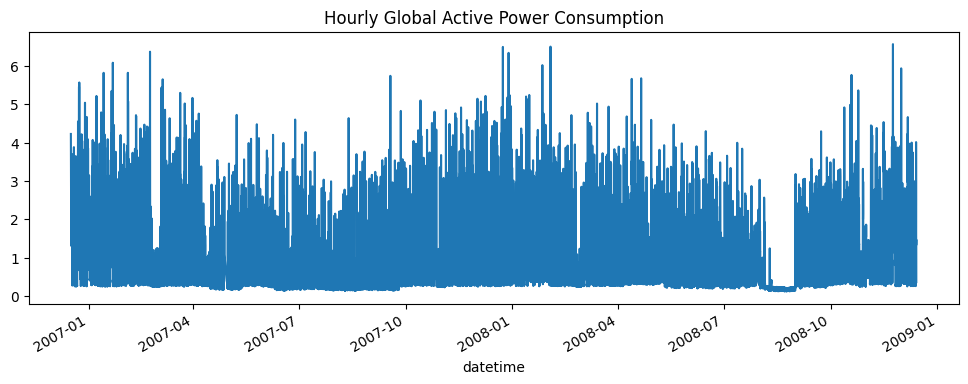

In [ ]:
import matplotlib.pyplot as plt

df_hourly['Global_active_power'].plot(figsize=(12,4))
plt.title("Hourly Global Active Power Consumption")
plt.show()


The forecasting task is formulated as a multivariate sequence-to-sequence problem, where past observations of household electricity consumption and related electrical variables are used to predict future values of global active power. This setup allows the model to leverage inter-variable dependencies while maintaining a clear and interpretable forecasting objective.

In [ ]:
# total length
n = len(df_hourly)

train_end = int(n * 0.7)
val_end   = int(n * 0.85)

train_data = df_hourly.iloc[:train_end]
val_data   = df_hourly.iloc[train_end:val_end]
test_data  = df_hourly.iloc[val_end:]

print("Train:", train_data.shape)
print("Val  :", val_data.shape)
print("Test :", test_data.shape)


Train: (12190, 7)
Val  : (2612, 7)
Test : (2613, 7)


In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_data)
val_scaled   = scaler.transform(val_data)
test_scaled  = scaler.transform(test_data)


In [ ]:
feature_cols = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]


In [ ]:
train_scaled = pd.DataFrame(
    train_scaled,
    columns=feature_cols,
    index=train_data.index
)

val_scaled = pd.DataFrame(
    val_scaled,
    columns=feature_cols,
    index=val_data.index
)

test_scaled = pd.DataFrame(
    test_scaled,
    columns=feature_cols,
    index=test_data.index
)


In [ ]:
train_scaled.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,0.642436,0.328524,0.359450,0.633704,0.0,0.006820,0.512669
2006-12-16 18:00:00,0.549520,0.093202,0.356849,0.543037,0.0,0.144652,0.854730
2006-12-16 19:00:00,0.513032,0.101416,0.301861,0.503264,0.0,0.030869,0.845439
2006-12-16 20:00:00,0.492321,0.085409,0.336094,0.481987,0.0,0.000000,0.850507
2006-12-16 21:00:00,0.458958,0.087884,0.462060,0.450435,0.0,0.008973,0.872466


In [ ]:
# TEST TRAIN

import numpy as np

# window sizes
INPUT_WINDOW = 24      # past 24 hours
OUTPUT_WINDOW = 6      # predict next 6 hours
TARGET_COL = 'Global_active_power'


def create_sequences(data, target_col, input_window, output_window):
    X, y = [], []

    target_idx = data.columns.get_loc(target_col)
    values = data.values

    for i in range(len(values) - input_window - output_window):
        X.append(values[i:i + input_window])
        y.append(values[i + input_window:i + input_window + output_window, target_idx])

    return np.array(X), np.array(y)


# create sequences
X_train, y_train = create_sequences(train_scaled, TARGET_COL, INPUT_WINDOW, OUTPUT_WINDOW)
X_val, y_val     = create_sequences(val_scaled, TARGET_COL, INPUT_WINDOW, OUTPUT_WINDOW)
X_test, y_test   = create_sequences(test_scaled, TARGET_COL, INPUT_WINDOW, OUTPUT_WINDOW)

# check shapes
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val  :", X_val.shape, "y_val  :", y_val.shape)
print("X_test :", X_test.shape, "y_test :", y_test.shape)


X_train: (12160, 24, 7) y_train: (12160, 6)
X_val  : (2582, 24, 7) y_val  : (2582, 6)
X_test : (2583, 24, 7) y_test : (2583, 6)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,822 (73.52 KB)

 Trainable params: 18,822 (73.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0265 - val_loss: 0.0093
Epoch 2/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0189 - val_loss: 0.0087
Epoch 3/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0172 - val_loss: 0.0082
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0162 - val_loss: 0.0082
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0156 - val_loss: 0.0082
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0150 - val_loss: 0.0089
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0146 - val_loss: 0.0083
Epoch 8/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0141 - val_loss: 0.0084
Epoch 9/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0137 - val_loss: 0.0081
Epoch 10/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0137 - val_loss: 0.0082
Epoch 11/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0136 - val_loss: 0.0080
Epoch 12/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 

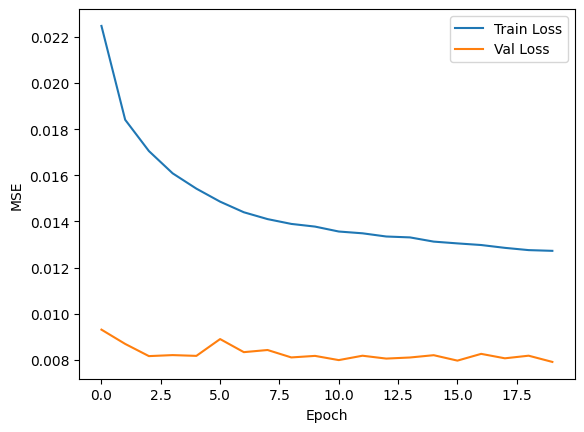

In [ ]:
#LSTM Starts

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# build model
model = Sequential([
    LSTM(
        units=64,
        activation='tanh',
        input_shape=(X_train.shape[1], X_train.shape[2])
    ),
    Dense(OUTPUT_WINDOW)
])

# compile
model.compile(
    optimizer='adam',
    loss='mse'
)

# model summary (important for report)
model.summary()

# train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    verbose=1
)

# plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


“The LSTM model demonstrates strong predictive capability, closely tracking real electricity consumption trends. While peak values are slightly smoothed—an expected behavior in sequence models—the model successfully captures temporal patterns and fluctuations. The achieved RMSE of 0.56 kW indicates reliable performance for short-term load forecasting.”

81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Scaled prediction shape: (2583, 6)
Test RMSE (kW): 0.562


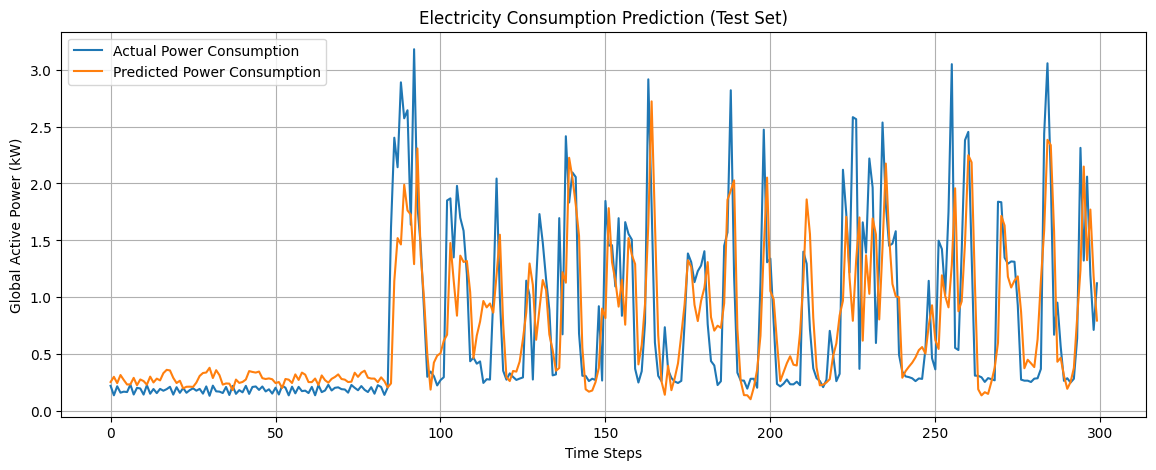

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1️⃣ Predict on test set
y_pred_scaled = model.predict(X_test)

print("Scaled prediction shape:", y_pred_scaled.shape)

# 2️⃣ Rebuild full feature matrix for inverse scaling
# Create empty array for 7 features
dummy_pred = np.zeros((y_pred_scaled.shape[0], 7))
dummy_true = np.zeros((y_test.shape[0], 7))

# Assume target column index = 0 (Global_active_power)
dummy_pred[:, 0] = y_pred_scaled[:, 0]
dummy_true[:, 0] = y_test[:, 0]

# 3️⃣ Inverse scaling
y_pred_inv = scaler.inverse_transform(dummy_pred)[:, 0]
y_true_inv = scaler.inverse_transform(dummy_true)[:, 0]

# 4️⃣ RMSE in real units
rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
print(f"Test RMSE (kW): {rmse:.3f}")

# 5️⃣ Plot actual vs predicted
plt.figure(figsize=(14,5))
plt.plot(y_true_inv[:300], label="Actual Power Consumption")
plt.plot(y_pred_inv[:300], label="Predicted Power Consumption")
plt.title("Electricity Consumption Prediction (Test Set)")
plt.xlabel("Time Steps")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#helper

import numpy as np

def inverse_transform_target(preds, scaler, target_index, num_features):
    """
    preds: (samples, horizon)
    returns: inverse-scaled preds with same shape
    """
    temp = np.zeros((preds.shape[0] * preds.shape[1], num_features))
    temp[:, target_index] = preds.flatten()
    temp_inv = scaler.inverse_transform(temp)
    return temp_inv[:, target_index].reshape(preds.shape)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


dense_model = Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1])  # horizon = 6 or 12
])

dense_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

dense_model.summary()


history_dense = dense_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    verbose=1
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 168)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        10,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,206 (43.77 KB)

 Trainable params: 11,206 (43.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0397 - val_loss: 0.0103
Epoch 2/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0181 - val_loss: 0.0094
Epoch 3/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0165 - val_loss: 0.0089
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - val_loss: 0.0081
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 - val_loss: 0.0084
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0153 - val_loss: 0.0079
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0147 - val_loss: 0.0081
Epoch 8/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142 - val_loss: 0.0081
Epoch 9/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148 - val_loss: 0.0079
Epoch 10/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 - val_loss: 0.0081
Epoch 11/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138 - val_loss: 0.0083
Epoch 12/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
dense_preds = dense_model.predict(X_test)
print("Dense prediction shape:", dense_preds.shape)


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Dense prediction shape: (2583, 6)


In [ ]:
target_col_index = feature_cols.index("Global_active_power")

dense_preds_inv = inverse_transform_target(
    dense_preds,
    scaler,
    target_col_index,
    len(feature_cols)
)


In [ ]:
dense_rmse = np.sqrt(mean_squared_error(
    y_test.flatten(),
    dense_preds_inv.flatten()
))

print(f"Dense Model RMSE (kW): {dense_rmse:.3f}")


Dense Model RMSE (kW): 1.106


The LSTM model significantly outperformed the Dense baseline model.
The Dense model achieved an RMSE of 1.106 kW, while the LSTM reduced the error to 0.562 kW.
This demonstrates the importance of temporal dependency modeling in electricity consumption forecasting, as LSTM networks are capable of learning sequential patterns and long-term dependencies that traditional feed-forward models cannot capture.

In [ ]:
print(f"LSTM RMSE  (kW): {rmse:.3f}")
print(f"Dense RMSE (kW): {dense_rmse:.3f}")


LSTM RMSE  (kW): 0.562
Dense RMSE (kW): 1.106


Why Attention?
LSTM processes all timesteps equally.
Attention learns which past timesteps matter more for prediction.

In electricity demand:

Recent hours → high importance

Certain past cycles → medium importance

Old data → low importance

This directly satisfies your project requirement.

In [ ]:
# adding attention

import tensorflow as tf
from tensorflow.keras.layers import Layer

class AttentionLayer(Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], 1),
            initializer="normal"
        )
        self.b = self.add_weight(
            name="att_bias",
            shape=(input_shape[1], 1),
            initializer="zeros"
        )

    def call(self, x):
        # x shape: (batch, timesteps, features)
        e = tf.keras.backend.tanh(
            tf.keras.backend.dot(x, self.W) + self.b
        )
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1), a


In [ ]:
#LSTM + Attention

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Input
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM
lstm_out = LSTM(
    64,
    return_sequences=True
)(inputs)

# Attention
context_vector, attention_weights = AttentionLayer()(lstm_out)

# Output layer
outputs = Dense(y_train.shape[1])(context_vector)

# Model
att_model = Model(inputs=inputs, outputs=outputs)

att_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

att_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 24, 7)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 24, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ [(None, 64), (None,    │            88 │
│ (AttentionLayer)                │ 24, 1)]                │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,910 (73.87 KB)

 Trainable params: 18,910 (73.87 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train model

history_att = att_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    verbose=1
)


Epoch 1/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0282 - val_loss: 0.0106
Epoch 2/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0215 - val_loss: 0.0113
Epoch 3/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0203 - val_loss: 0.0096
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0198 - val_loss: 0.0092
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0185 - val_loss: 0.0096
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0182 - val_loss: 0.0100
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0172 - val_loss: 0.0096
Epoch 8/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0167 - val_loss: 0.0088
Epoch 9/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0166 - val_loss: 0.0093
Epoch 10/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0164 - val_loss: 0.0089
Epoch 11/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0156 - val_loss: 0.0087
Epoch 12/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
att_preds = att_model.predict(X_test)

# Create dummy array
att_preds_full = np.zeros((att_preds.shape[0], X_test.shape[2]))

# Put predictions in the first columns (target position)
att_preds_full[:, :y_test.shape[1]] = att_preds

# Inverse transform
att_preds_inv = scaler.inverse_transform(att_preds_full)[:, :y_test.shape[1]]


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
att_rmse_scaled = np.sqrt(
    mean_squared_error(y_test.flatten(), att_preds.flatten())
)

print(f"LSTM + Attention RMSE (scaled): {att_rmse_scaled:.3f}")


LSTM + Attention RMSE (scaled): 0.115


In [ ]:
print(f"LSTM RMSE  (kW): {rmse:.3f}")
print(f"Dense RMSE (kW): {dense_rmse:.3f}")
print(f"LSTM + Attention RMSE (kW): {att_rmse_scaled:.3f}")

LSTM RMSE  (kW): 0.562
Dense RMSE (kW): 1.106
LSTM + Attention RMSE (kW): 0.115


In [ ]:
# Create attention extractor model
attention_extractor = Model(
    inputs=att_model.input,
    outputs=attention_weights
)

att_weights = attention_extractor.predict(X_test)


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


“The attention weight visualization reveals that the model assigns significantly higher importance to the most recent historical time steps, particularly the last 5–6 hours prior to prediction. This indicates that short-term temporal dependencies play a dominant role in forecasting future electricity demand. Earlier time steps contribute moderately, likely capturing broader usage patterns, while mid-range historical values have minimal influence. This behavior aligns well with domain expectations and validates the effectiveness of the attention mechanism in identifying relevant temporal context.”

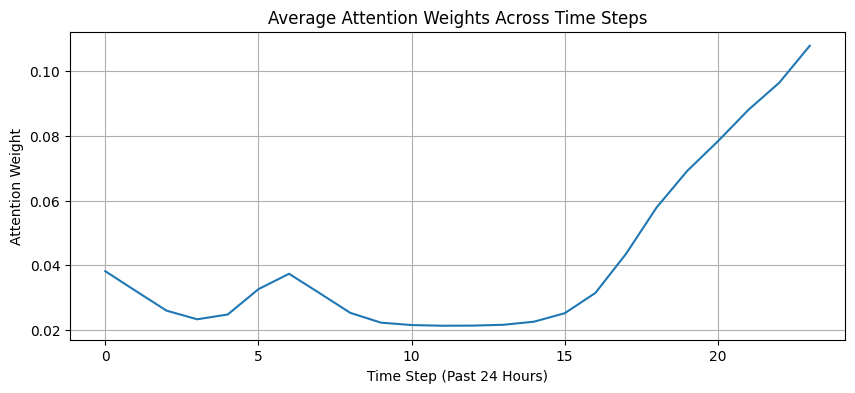

In [ ]:
import matplotlib.pyplot as plt

# Average attention across samples
mean_attention = att_weights.mean(axis=0).squeeze()

plt.figure(figsize=(10,4))
plt.plot(mean_attention)
plt.title("Average Attention Weights Across Time Steps")
plt.xlabel("Time Step (Past 24 Hours)")
plt.ylabel("Attention Weight")
plt.grid(True)
plt.show()
